## CS345 Fall 2022 Assignment 4


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1:  Linear regression on medical insurance data

We will try to predict insurance charges based on a collection of features that include age, gender, body-mass-index (BMI), number of children, whether a person smokes, and the region in the US the live in.
Since the file contains string data in addition to numeric data let's first read the file using the Python `requests` module:

In [3]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen
link = "https://github.com/asabenhur/CS345/raw/master/fall22/data/insurance.csv"
# retrieve the contents of the file
contents = requests.get(link)

Let's take a look at the first five rows of the data:

In [4]:
contents.text.split()[:5]

['age,sex,bmi,children,smoker,region,charges',
 '19,female,27.9,0,yes,southwest,16884.924',
 '18,male,33.77,1,no,southeast,1725.5523',
 '28,male,33,3,no,southeast,4449.462',
 '33,male,22.705,0,no,northwest,21984.47061']

As you can see the header specifies the names of the features:

```
age,sex,bmi,children,smoker,region,charges
```

The names are self explanatory.  We will use the last column as our label/target variable, and try to predict it from the other variables.

Since the data is a mix of numerical and categorical variables, we will need to do some work to create a feature matrix from this file.

This data has three types of features:

* Numerical data (the age, bmi, and children features)
* Categorical data that has one of two values (the sex and smoker features)
* Categorical data that has more than two possible values.  The "region" feature has the values "southwest", "southeast", "northwest", and "northeast".

Numerical data can be left as is; binary categorical data can be converted to 0/1.  Categorical variables with more than two possible values require a different approach, which is called "one-hot-encoding", where each value receives its own feature, and the single categorical variable is replaced with a set of features.  The number of features equals the number of unique values that the categorical variable takes, and a categorical value is encoded as a vector of zeros, with a single one in the feature that corresponds to the given value.  Let us demonstrate this using the one-hot-encoder of scikit-learn on our "region" variable:

In [5]:
from sklearn.preprocessing import OneHotEncoder

X = [['southwest'], ['southeast'], ['northwest'], ['northeast']]
encoder = OneHotEncoder()
encoder.fit_transform(X).toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In your code you may not use the scikit-learn one-hot-encoder.

Now, you might ask why not simply encode these four values using the number 0-3.  The issue with doing that is that this representation imposes an order on the values, an order that does not necessarily reflect the interpretation of these features in the real world.

Your tasks are as follows:

* Create a feature matrix and labels vector from the given data as described above.
* Split the data into separate train and test sets with 30% of the data reserved for testing.
* Evaluate the error of linear regression on the train and test sets.  In doing so, first standardize the features.  Note that not all the features should be standardized - only the age and BMI features need that, because they are significantly larger than one.  You can use the scikit-learn implementations for linear regression, but note that its implementation for standardization does not provide the necessary flexibility to perform standardization on a selected set of features only.  Note that when standardizing, *only the features need to be standardized*.  The labels should remain unaltered.
* As discussed in class, the magnitude of the components of the weight vector provide an indication of the usefulness of a feature. Using the components of the weight vector, choose a subset of the features that are most useful for the regression task (use the absolute value of the weight, because large negative values also suggest usefulness).  Compare the error before and after removing the features with the lowest weight vector components.  Comment on your results.

For computing regression error use mean asbsolute error (MAE).

In [6]:
contents.text.split()[:10]

['age,sex,bmi,children,smoker,region,charges',
 '19,female,27.9,0,yes,southwest,16884.924',
 '18,male,33.77,1,no,southeast,1725.5523',
 '28,male,33,3,no,southeast,4449.462',
 '33,male,22.705,0,no,northwest,21984.47061',
 '32,male,28.88,0,no,northwest,3866.8552',
 '31,female,25.74,0,no,southeast,3756.6216',
 '46,female,33.44,1,no,southeast,8240.5896',
 '37,female,27.74,3,no,northwest,7281.5056',
 '37,male,29.83,2,no,northeast,6406.4107']

In [7]:
# your code here
import numpy as np

temp = []
for i in contents.text.split():
  temp.append(i.split(","))

np_temp = np.array(temp)
lables = np_temp[:, -1]
features = np_temp[:, :-1]

features = np.where(features == "female",0,features)
features = np.where(features == "male",1,features)
features = np.where(features == "yes",1,features)
features = np.where(features == "no",0,features)


In [9]:
def one_hot_enc(ls1):
  n_labels = np.unique(ls1)
  for i in n_labels:
    arr = []
    enc = ""
    for j in range(len(n_labels)):
      if i == n_labels[j]:
        enc += "1"
      else:
        enc +="0"
      if j != len(n_labels)-1:
          enc +=","
    ls1 = np.where(ls1 == i,enc,ls1)
    # print(enc)
  temp1=[ i.split(",") for i in ls1]
  temp1=np.array(temp1,dtype=np.int64)
  return temp1

In [10]:
region = one_hot_enc(features[1:,-1])
final_labels = lables[1:].astype(float)
final_features = np.hstack([features[1:,:-1].astype(float),region.astype(int)])

In [11]:
print("labels",final_labels)
print("features",final_features)

labels [16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
features [[19.    0.   27.9  ...  0.    0.    1.  ]
 [18.    1.   33.77 ...  0.    1.    0.  ]
 [28.    1.   33.   ...  0.    1.    0.  ]
 ...
 [18.    0.   36.85 ...  0.    1.    0.  ]
 [21.    0.   25.8  ...  0.    0.    1.  ]
 [61.    0.   29.07 ...  1.    0.    0.  ]]


In [12]:
def standardization(x):
  return (x - np.mean(x, axis=0)) / np.std(x, axis=0)
  
# standardize age = final_features[:,0] and BMI =final_features[:,2]
final_features[:,0] = standardization(final_features[:,0])
final_features[:,2] = standardization(final_features[:,2])

print(final_features[:,0])
print(final_features[:,2])
# print(final_features)
 

[-1.43876426 -1.50996545 -0.79795355 ... -1.50996545 -1.29636188
  1.55168573]
[-0.45332     0.5096211   0.38330685 ...  1.0148781  -0.79781341
 -0.26138796]


In [13]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the dataset with 30% test set
X_train, X_test, y_train, y_test = train_test_split(final_features, final_labels, test_size=0.3, random_state=5)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
MAE_before = metrics.mean_absolute_error(y_test, y_pred)


In [14]:
final_features_remove = np.delete(final_features, 1, 1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(final_features_remove, final_labels, test_size=0.3, random_state=5)
linreg = LinearRegression()
linreg.fit(X_train1, y_train1)
y_pred1 = linreg.predict(X_test1)
MAE_after = metrics.mean_absolute_error(y_test1, y_pred1)

In [15]:
print(MAE_before, MAE_after)

4074.551503309402 4078.4775773354086


**and a cell for discussing your results**

The result of error before and after removing the features with the lowest weight vector components which we can see easily after removing the features, the mean asbsolute error increase. this shows that less features, having better perfermance. 

## Part 2:  polynomial regression

In this part we will explore polynomial regression using the Boston housing dataset, which is distributed with scikit-learn.


In [1]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target
print(X.shape,y.shape);

(506, 13) (506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

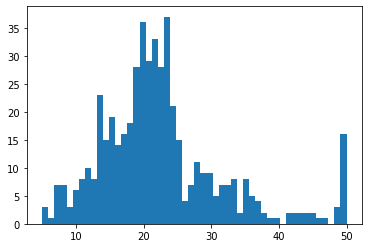

In [17]:
plt.hist(y, bins=50);

A complete description of the dataset is contained in the `DESCR` attribute of the dataset:

```python
print(data.DESCR)
```

Here is your task:

* Compute the error of polynomial basis regression as a function of the degree of the polynomial for the Boston housing dataset.  Start with degree equal to 1, i.e. using the features as-is.  In each case compute accuracy for both the training set, and a separate test set.  Comment on your results.  Do you observe overfitting?  You can use the scikit-learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class as shown in class.  It is *highly recommended* to standardize the features for this task.
* Choose a value of the degree for which polynomial basis regression yields overfitting, and use ridge regression to reduce the effect of overfitting.  Is there a value of the regularization parameter $\alpha$ for which you are able to obtain test set error that is similar or better than the error of linear regression?
* Compute the error of the following simple regression method that for a given regression problem always returns the median label value.  Compare this error with the error using linear regression and comment on the result.  Why is computing the error of this naive method a useful thing to do?

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
linreg = LinearRegression()


def accuracy(d):
  poly_regs = PolynomialFeatures(degree = d) 
  x_poly_train = poly_regs.fit_transform(X_train)
  x_poly_test = poly_regs.fit_transform(X_test) 
  poly_regs.fit(X_train,y_train)
  linreg.fit(x_poly_train,y_train)
  y_pred_test = linreg.predict(x_poly_test)
  y_pred_train = linreg.predict(x_poly_train)
  acc_train = np.mean(y_train-y_pred_train)
  acc_test = np.mean(y_test-y_pred_test)
  # acc_train = mean_squared_error(y_train,y_pred_train)
  # acc_test = mean_squared_error(y_test,y_pred_test)

  print("Degree is",d, "Accuaracy for training set is",acc_train, "Accuaracy for testing set is ", acc_test)

In [19]:
accuracy(1)
accuracy(2)
accuracy(3)
accuracy(4)
accuracy(5)
accuracy(6)

Degree is 1 Accuaracy for training set is 3.0830328873658584e-14 Accuaracy for testing set is  0.6037170560544168
Degree is 2 Accuaracy for training set is 1.789654425909885e-13 Accuaracy for testing set is  -0.1584056592626151
Degree is 3 Accuaracy for training set is 2.2992229589162582e-12 Accuaracy for testing set is  57.992175256251215
Degree is 4 Accuaracy for training set is 2.6807537984806737e-11 Accuaracy for testing set is  316.80870960633445
Degree is 5 Accuaracy for training set is -1.82026245928076e-11 Accuaracy for testing set is  263.40247446150335
Degree is 6 Accuaracy for training set is 1.3869026454589618e-11 Accuaracy for testing set is  221.38514040335212


In [20]:
lst ={'degree 1': [3.0830328873658584e-14,0.6037170560544168],
      'degree 2': [1.789654425909885e-13, -0.1584056592626151],
      'degree 3': [2.2992229589162582e-12,57.992175256251215],
      'degree 4':[2.6807537984806737e-11,316.80870960633445],
      'degree 5':[-1.82026245928076e-11,263.40247446150335],
      'degree 6':[1.3869026454589618e-11,221.38514040335212]}
df = pd.DataFrame(lst,index =["Accuraacy for training set", "Accuracy for testing set"])
display(df)

,degree 1,degree 2,degree 3,degree 4,degree 5,degree 6
Accuraacy for training set,3.083033e-14,1.789654e-13,2.299223e-12,2.680754e-11,-1.820262e-11,1.386903e-11
Accuracy for testing set,6.037171e-01,-1.584057e-01,5.799218e+01,3.168087e+02,2.634025e+02,2.213851e+02


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
linreg = LinearRegression()

d = [1,2,3,4,5,6,7,8]
err_train =[]
err_test =[]
for i in d:
  poly_regs = PolynomialFeatures(degree = i) 
  x_poly_train = poly_regs.fit_transform(X_train)
  x_poly_test = poly_regs.fit_transform(X_test) 
  poly_regs.fit(X_train,y_train)
  linreg.fit(x_poly_train,y_train)
  y_pred_test = linreg.predict(x_poly_test)
  y_pred_train = linreg.predict(x_poly_train)
  # acc_train = np.mean(y_train-y_pred_train)
  # acc_test = np.mean(y_test-y_pred_test)
  err_train.append(mean_squared_error(y_train,y_pred_train))
  err_test.append(mean_squared_error(y_test,y_pred_test))
print(err_train, err_test)

[19.068341850927226, 5.329363416561503, 5.934425052250348e-17, 4.36797657007411e-20, 6.4604501000058565e-21, 1.0915216882117292e-20, 6.6672770715070914e-18, 2.0459284741633335e-20] [30.69703770408853, 18.12803011177856, 108140.16901946526, 9303876.306223242, 4175182.003385187, 2725103.734809174, 2209959.533754606, 1876980.3598701064]


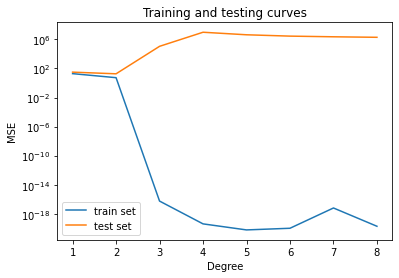

In [22]:
import matplotlib.pyplot as plt

y_train = err_train
y_test = err_test
plt.semilogy(d,y_train,label = "train set")
plt.semilogy(d,y_test, label = "test set")
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title("Training and testing curves")
plt.legend();

In [23]:
#  use ridge regression to reduce the effect of overfitting. 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = Ridge()
# print(X_train.shape,X_test.shape)
X_train = X_train[:,6].reshape(-1,1)
X_test = X_test[:,6].reshape(-1,1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f"w = {model.coef_}")
print(f"w_0 = {model.intercept_}")
print(f"default score = {model.score(X_test, y_test)}")
print(f"MSE = {mean_squared_error(y_test, pred)}")
print(f"r2 score = {r2_score(y_test, pred)}")

print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

w = [-0.12860826]
w_0 = 31.197926907807044
default score = 0.0900549004602802
MSE = 86.52415534706066
r2 score = 0.0900549004602802
X_test.shape = (152, 1), y_test.shape = (152,)


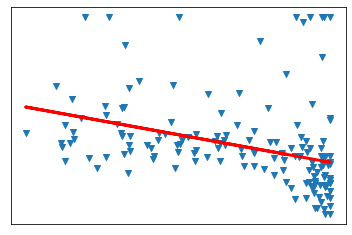

In [24]:
plt.scatter(X_test, y_test, marker='v')
plt.plot(X_test, pred, color="red", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

**Discussion of your results here**
1. Base one the dataframe for each degree of the polynomial and graph of training and testing curves, we can easily know that the model is overfit. since there is low training error but a high testing error.

2. α is to controls the shrinkage of the coefficients which when the larger the value of α, the greater the shrinkage and the model is to be more collinear.

### Your Report

Answer the questions in the cells reserved for that purpose.

### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you:


```
Grading sheet for assignment 2

Part 1:  50 points.
Part 2:  50 points.
```

Grading will be based on the following criteria:

  * Code correctness.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.
  
